In [1]:
import numpy as np
from PIL import ImageGrab
import cv2
import time

PS4 controller time format
2021-02-09T12:01:44.602908Z

In [5]:
import datetime

x = datetime.datetime.now()
print(x)

2021-02-09 19:45:04.517001


In [16]:
# 800x480 windowed mode
printscreen =  np.array(ImageGrab.grab(bbox=(0,40,960,560)))
print('Current time: {}'.format(datetime.datetime.now()))
# cv2.imshow('window',cv2.cvtColor(printscreen, cv2.COLOR_BGR2RGB))
# cv2.destroyAllWindows()

Current time: 2021-02-09 20:01:59.113873


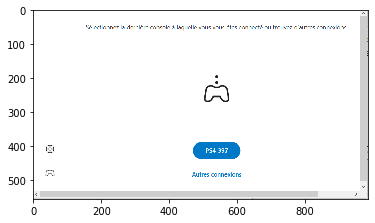

In [27]:
# 800x480 windowed mode 
import matplotlib.pyplot as plt
printscreen =  np.array(ImageGrab.grab(bbox=(0,40,985,595)))
plt.imshow(printscreen)

In [15]:
cv2.imwrite("printscreen-{}.png".format(time.time()),printscreen)

True

In [10]:
cv2.imwrite("psremoteplay.png",printscreen)

True

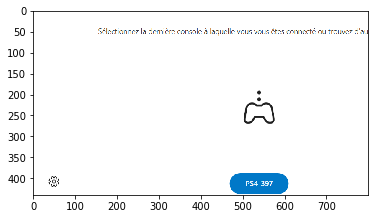

In [11]:
printscreen = cv2.imread("psremoteplay.png")
plt.imshow(printscreen)

In [28]:
# create_training_data.py

import numpy as np
from PIL import ImageGrab
import cv2
import datetime
import os

In [29]:
file_name = 'training_data.npy'

if os.path.isfile(file_name):
    print('File exists, loading previous data!')
    training_data = list(np.load(file_name))
else:
    print('File does not exist, starting fresh!')
    training_data = []

File does not exist, starting fresh!


In [ ]:
training_data = []

In [33]:
screen =  np.array(ImageGrab.grab(bbox=(0,40,960,560)))
timing = datetime.datetime.now()
# screen = cv2.resize(screen, (160,120))
training_data.append([screen,timing])

In [34]:
screen =  np.array(ImageGrab.grab(bbox=(0,40,960,560)))
timing = datetime.datetime.now()
# screen = cv2.resize(screen, (160,120))
training_data.append([screen,timing])

In [39]:
training_data[0][1],training_data[1][1]

(datetime.datetime(2021, 2, 9, 20, 41, 36, 516933),
 datetime.datetime(2021, 2, 9, 20, 41, 41, 325098))

In [35]:
# file_name = 'training_data.npy'
np.save(file_name,training_data)

In [40]:
training_data = np.load("training_data.npy",allow_pickle=True)

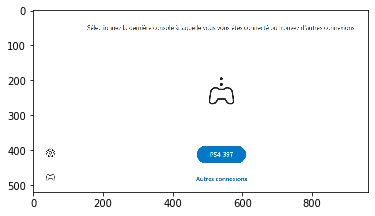

In [42]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0][0])

Steering dataset

In [4]:
import numpy as np
training_data1 = np.load("training_data_angle/training_data-1.npy",allow_pickle=True)
training_data1[0][1]

[-0.01580810546875, -0.210968017578125]

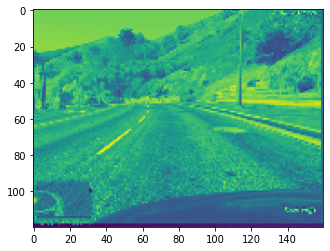

In [5]:
# Plot the training data 
import matplotlib.pyplot as plt
plt.imshow(training_data1[0][0])

Save training dataset as images & video 

https://theailearner.com/2018/10/15/creating-video-from-images-using-opencv-python/

In [1]:
import numpy as np
training_data = np.load("training_data.npy",allow_pickle=True)

In [2]:
len(training_data)

200

In [5]:
len(training_data[0:100])

100

In [40]:
 #https://theailearner.com/2018/10/15/creating-video-from-images-using-opencv-python/

# import numpy as np
# training_data = np.load("training_data.npy",allow_pickle=True)
import cv2
 

img_array = []

for i in range(10):
    # print(img[0][0])
    img_array.append(training_data[i][0])
    cv2.imwrite("training_data/training_data_"+str(i)+".jpg",training_data[i][0])

In [36]:
cv2.imwrite('test.png',training_data[0][0])

True

In [42]:
import cv2
import numpy as np
import glob
 
img_array = []
for filename in glob.glob('training_data/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
# out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()